In [9]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# ensuring we see all the columns in the dataframe
pd.set_option('display.max_columns', 200)

In [10]:
# Importing the cleaned data
df = pd.read_parquet('../data/02_data_cleaning.parquet')

# Previewing the data
df.head()

,index,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,People_Onboard,Abbreviation,US_State
0,0,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,None,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,None,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,2,WA,Washington
1,1,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,None,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,2,NJ,New Jersey
2,2,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,None,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,3,FL,Florida
3,3,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,None,None,Non-Fatal,Substantial,None,N44832,Piper,PA-28-161,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,1,NM,New Mexico
4,4,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,None,TUSKEGEE,Non-Fatal,Substantial,None,N4275S,Beech,V35B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982,1,AL,Alabama


# Make Fatality Rate

In [11]:
# Calculating % Fatal
df['Fatal_%'] = ((df['Total_Fatal_Injuries'] / df['People_Onboard']) * 100).replace([np.inf, -np.inf], np.nan)

# Filling null values with 0
df['Fatal_%'] = df['Fatal_%'].fillna(0)

# Preview
df['Fatal_%'].head(10)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6    100.0
7    100.0
8    100.0
9      0.0
Name: Fatal_%, dtype: float64

In [12]:
# Value Counts of manufacturers
manufacturers = df['Make'].value_counts()

# Filter manufacturers with 100 or more appearances
valid_makes = df['Make'].value_counts().reset_index().query('count >= 100')

# Filter the original dataframe to keep only these manufacturers
manf_fatality = (df[df['Make'].isin(valid_makes['Make'])].groupby('Make')['Fatal_%'].mean().sort_values().reset_index())

/var/folders/dk/bbbpl6jd64q1jk5kph5vgr300000gn/T/ipykernel_1401/3771876477.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45, ha = 'right')


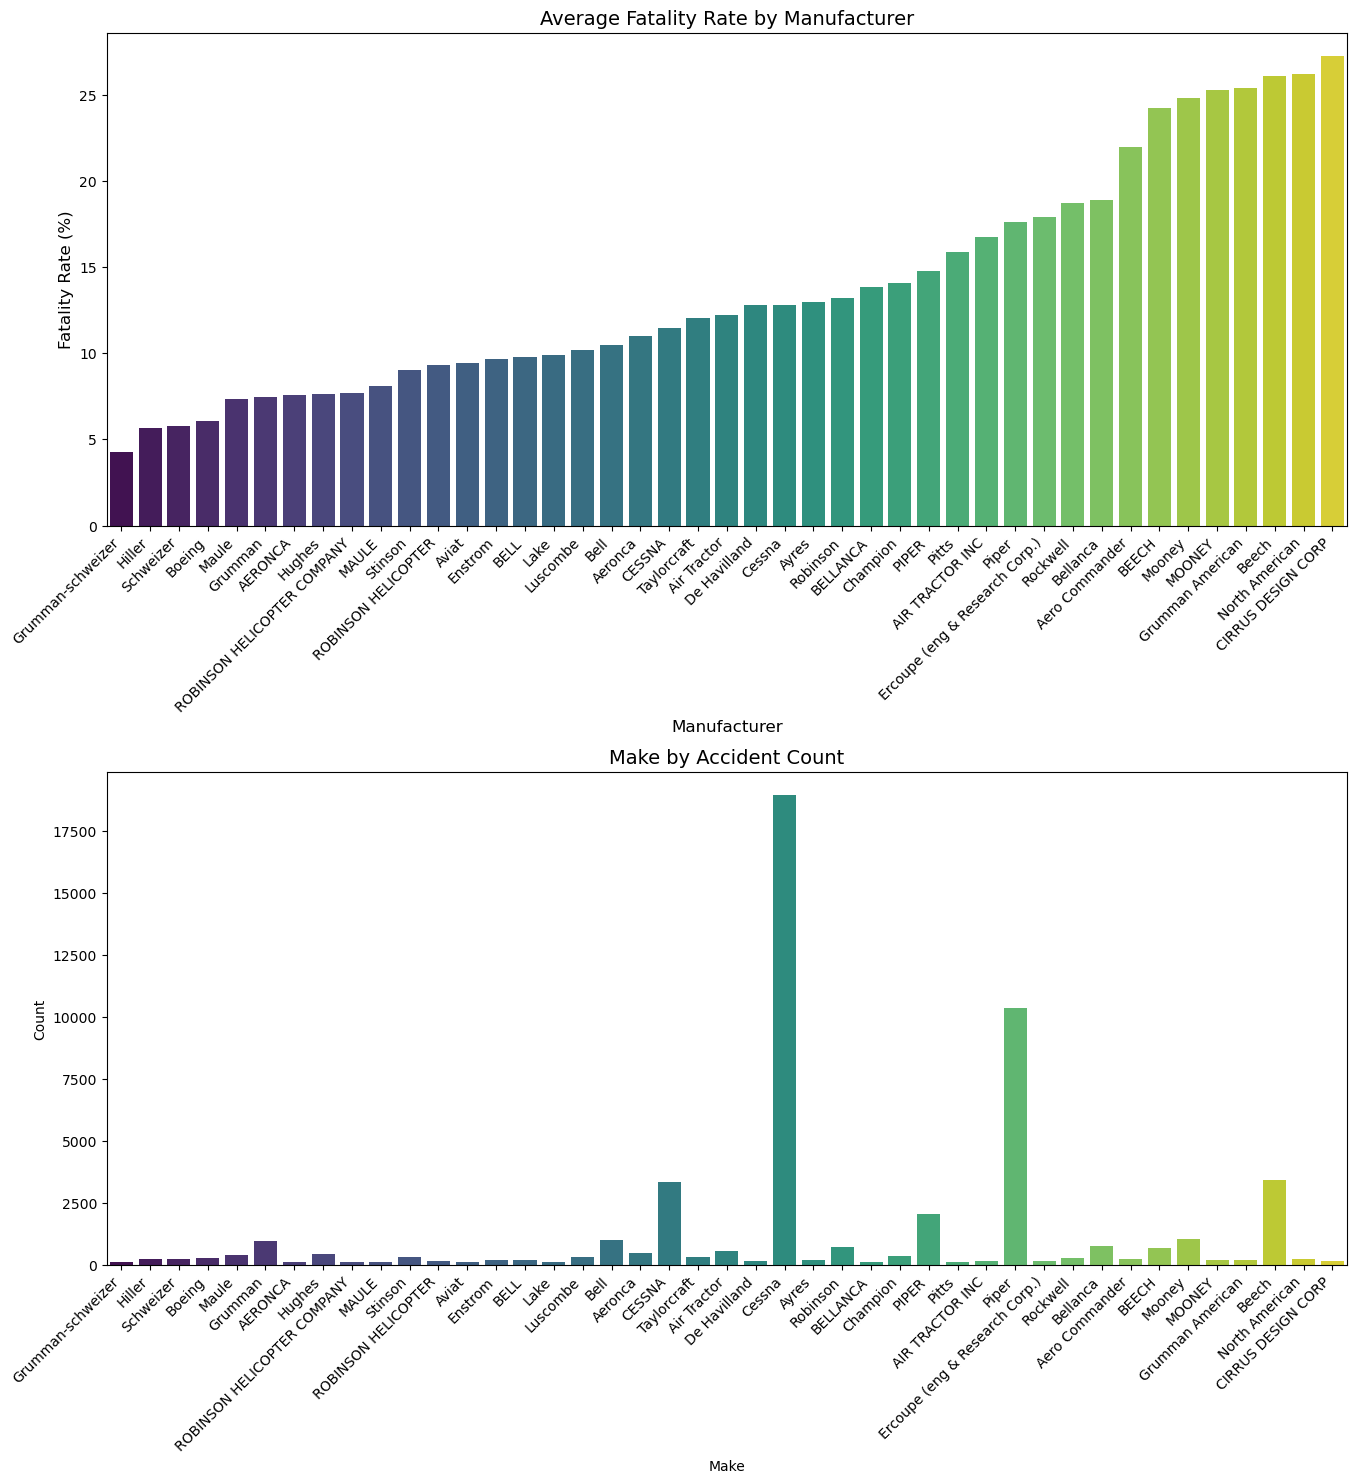

In [28]:
# # Plot of Injury Fatality Rate by Manufacutuer

# # Creating the figure 
# fig, axes = plt.subplots(2, 1, figsize = (16, 16))

# # Creating the plot 1
# sns.barplot(data = manf_fatality, x = 'Make', y = 'Fatal_%', hue = 'Make', palette = "viridis", legend = False, ax = axes[0]);

# # Formatting
# axes[0].set_title("Average Fatality Rate by Manufacturer", fontsize = 14)
# axes[0].set_xlabel('Manufacturer', fontsize = 12)
# axes[0].set_ylabel('Fatality Rate (%)', fontsize = 12)
# axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45, ha = 'right')

# # Plotting
# sns.barplot(data = risk_score, x = 'Make', y = 'Accident_Count', hue = 'Make', palette = 'viridis', ax = axes[1])

# # Labelling the plot
# axes[1].set_title('Make by Accident Count', fontsize = 14)
# axes[1].set_xlabel('Make')
# axes[1].set_ylabel('Count')
# plt.xticks(rotation = 45, ha = 'right')

# # Adjusting Vertical spacing
# plt.subplots_adjust(hspace = 0.5)

# # Show the plot
# plt.show()


/var/folders/dk/bbbpl6jd64q1jk5kph5vgr300000gn/T/ipykernel_1401/3369138908.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation = 45, ha = 'right')


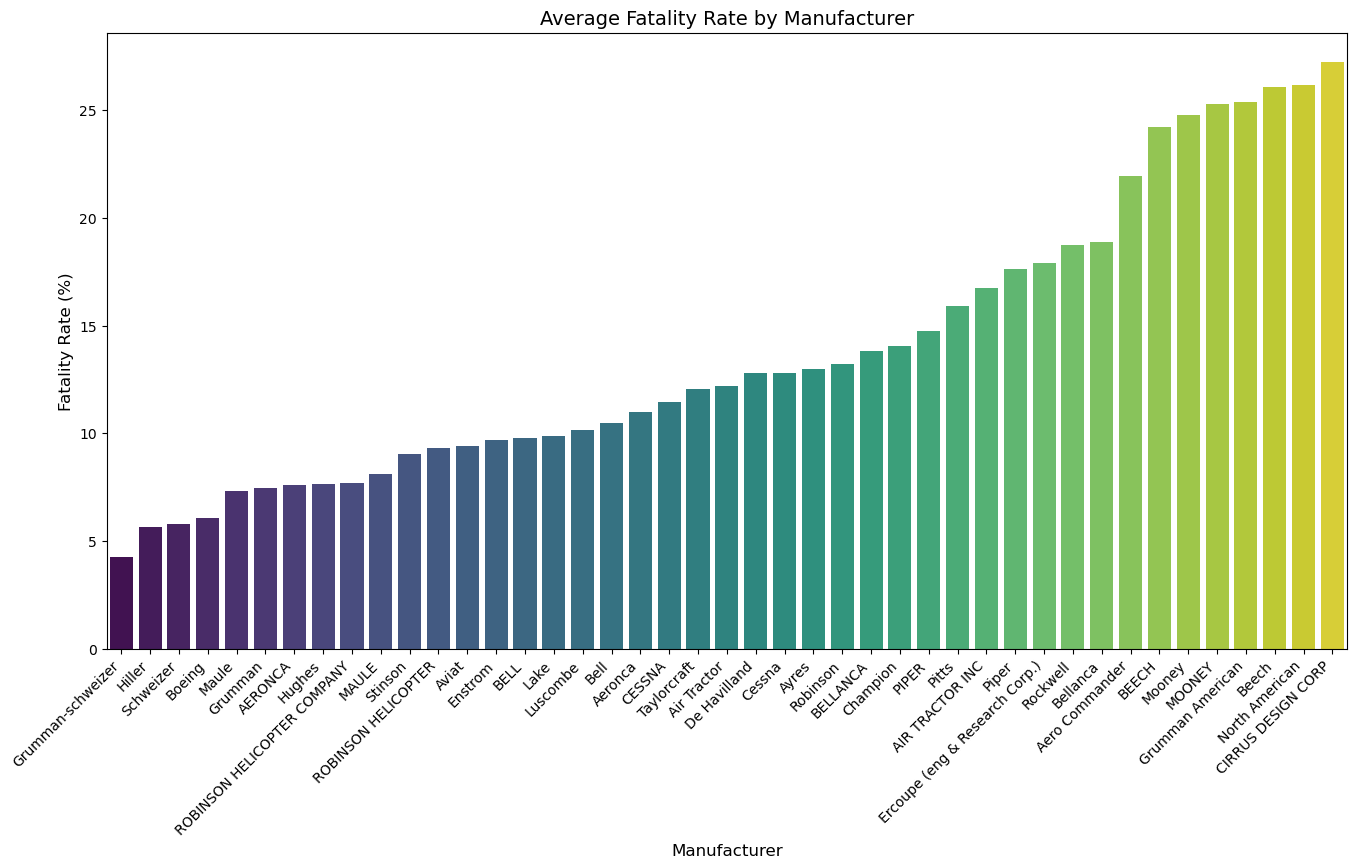

In [14]:
# Creating the figure 
fig, axes = plt.subplots(1, 1, figsize = (16, 8))

# Creating the plot 1
sns.barplot(data = manf_fatality, x = 'Make', y = 'Fatal_%', hue = 'Make', palette = "viridis", legend = False);

# Formatting
axes.set_title("Average Fatality Rate by Manufacturer", fontsize = 14)
axes.set_xlabel('Manufacturer', fontsize = 12)
axes.set_ylabel('Fatality Rate (%)', fontsize = 12)
axes.set_xticklabels(axes.get_xticklabels(), rotation = 45, ha = 'right')

# Showing the plot
plt.show();

In [15]:
# Calculating risk scores
risk_score = manf_fatality.merge(valid_makes, on='Make', how='inner')

# Renaming Columns
risk_score.rename(columns = {'count' : 'Accident_Count', 'Fatal_%' : 'Fatality_Rate'}, inplace = True)

# Preview
risk_score.head(15)

,Make,Fatality_Rate,Accident_Count
0,Grumman-schweizer,4.273504,117
1,Hiller,5.646259,245
2,Schweizer,5.776892,251
3,Boeing,6.072351,258
4,Maule,7.345528,410
5,Grumman,7.455479,969
6,AERONCA,7.600000,125
7,Hughes,7.636933,426
8,ROBINSON HELICOPTER COMPANY,7.703081,119
9,MAULE,8.119658,117


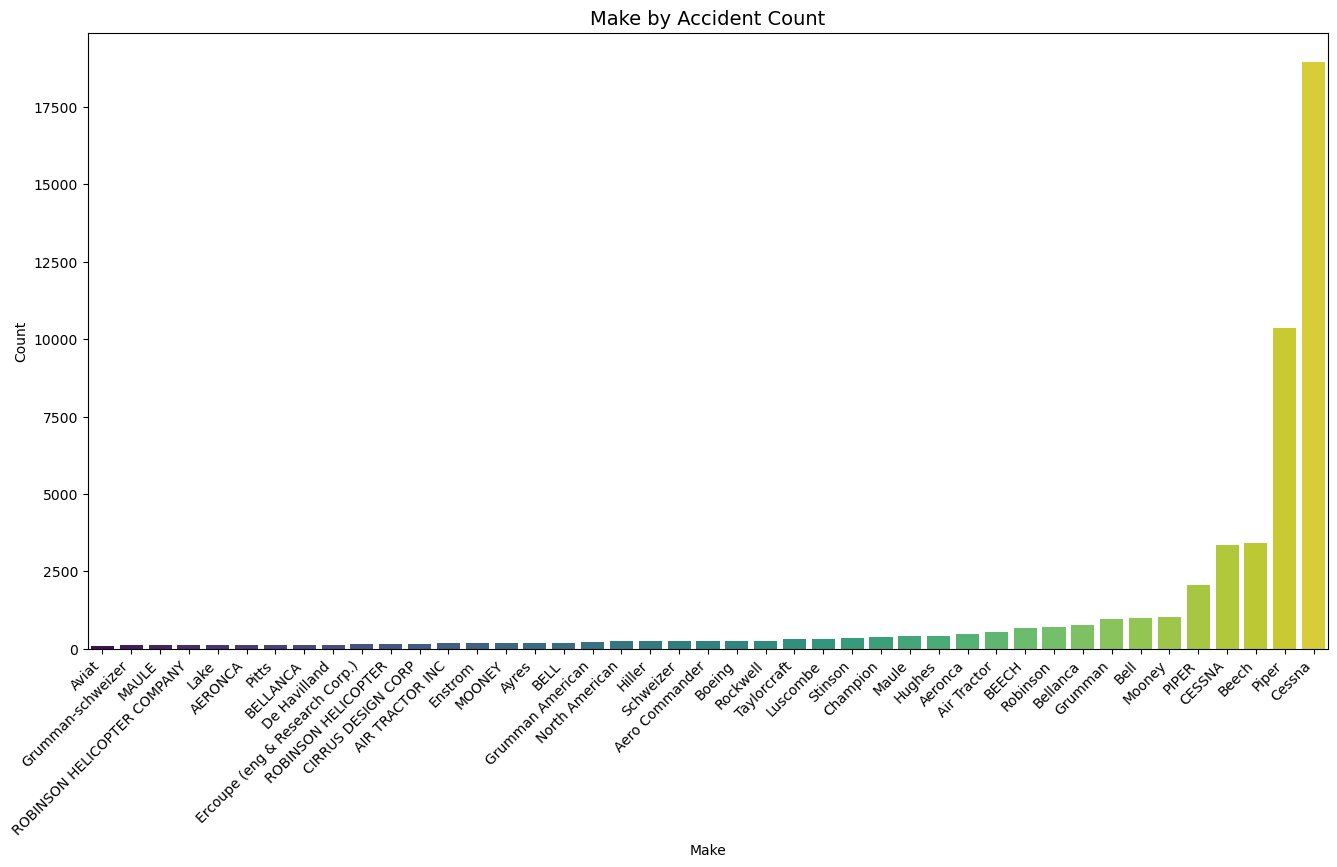

In [16]:
# Creating the figure 
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

# Plotting
risk_score_sorted = risk_score.sort_values(by = 'Accident_Count', ascending = True)

sns.barplot(data = risk_score_sorted, x = 'Make', y = 'Accident_Count', hue = 'Make', palette = 'viridis')

# Labelling the plot
ax.set_title('Make by Accident Count', fontsize = 14)
ax.set_xlabel('Make')
ax.set_ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')

# Show the plot
plt.show();

In [17]:
df

,index,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,People_Onboard,Abbreviation,US_State,Fatal_%
0,0,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,None,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,None,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,2,WA,Washington,0.0
1,1,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,None,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,2,NJ,New Jersey,0.0
2,2,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,None,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,3,FL,Florida,0.0
3,3,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,None,None,Non-Fatal,Substantial,None,N44832,Piper,PA-28-161,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,1,NM,New Mexico,0.0
4,4,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,None,TUSKEGEE,Non-Fatal,Substantial,None,N4275S,Beech,V35B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982,1,AL,Alabama,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64911,64937,20221011106091,Accident,CEN23LA007,2022-10-06,"Waldron, AR",United States,M27,M27,Non-Fatal,Substantial,Airplane,N717AB,WASZAK ARTHUR B,WITTMAN TAILWIND W10,Yes,1.0,Reciprocating,091,None,Personal,0.0,0.0,0.0,1.0,VMC,None,The pilots failure to maintain adequate airsp...,None,2022,1,AR,Arkansas,0.0
64912,64938,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,PVT,Private,Non-Fatal,Substantial,Airplane,N18158,CESSNA,150,No,1.0,Reciprocating,091,NSCH,Personal,0.0,0.0,0.0,1.0,VMC,None,The pilots failure to maintain control of the...,20-12-2022,2022,1,TX,Texas,0.0
64913,64939,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,LZU,GWINNETT COUNTY - BRISCOE FLD,Non-Fatal,Substantial,Airplane,N2047Q,CESSNA,177RG,No,1.0,Reciprocating,091,None,Personal,0.0,0.0,0.0,2.0,VMC,None,An in-flight collision with a bird while on ap...,20-12-2022,2022,2,GA,Georgia,0.0
64914,64940,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,1F0,Ardmore Downtown Executive Air,Non-Fatal,Substantial,Airplane,N2889W,BEECH,B-60,No,2.0,Reciprocating,091,None,Personal,0.0,0.0,0.0,1.0,VMC,None,The pilot did not ensure adequate clearance fr...,20-12-2022,2022,1,OK,Oklahoma,0.0


In [18]:
# Grouping Cessna and Piper accidents by flight purpose
cessna_piper_purpose = (
    df[df['Make'].isin(['Cessna', 'Piper'])]
    .groupby('Make')['Purpose_of_flight']
    .value_counts(normalize = True)
)

# Renaming the Index
cessna_piper_purpose = cessna_piper_purpose.rename_axis(index={'Purpose_of_flight': 'Flight_Purpose'})

# Convert Series to DataFrame
cessna_piper_purpose = cessna_piper_purpose.reset_index(name='Proportion')

cessna_piper_purpose

,Make,Flight_Purpose,Proportion
0,Cessna,Personal,0.668461
1,Cessna,Instructional,0.223331
2,Cessna,Business,0.061599
3,Cessna,Aerial Application,0.030721
4,Cessna,Positioning,0.015888
5,Piper,Personal,0.733700
6,Piper,Instructional,0.148363
7,Piper,Business,0.070221
8,Piper,Aerial Application,0.034386
9,Piper,Positioning,0.013329


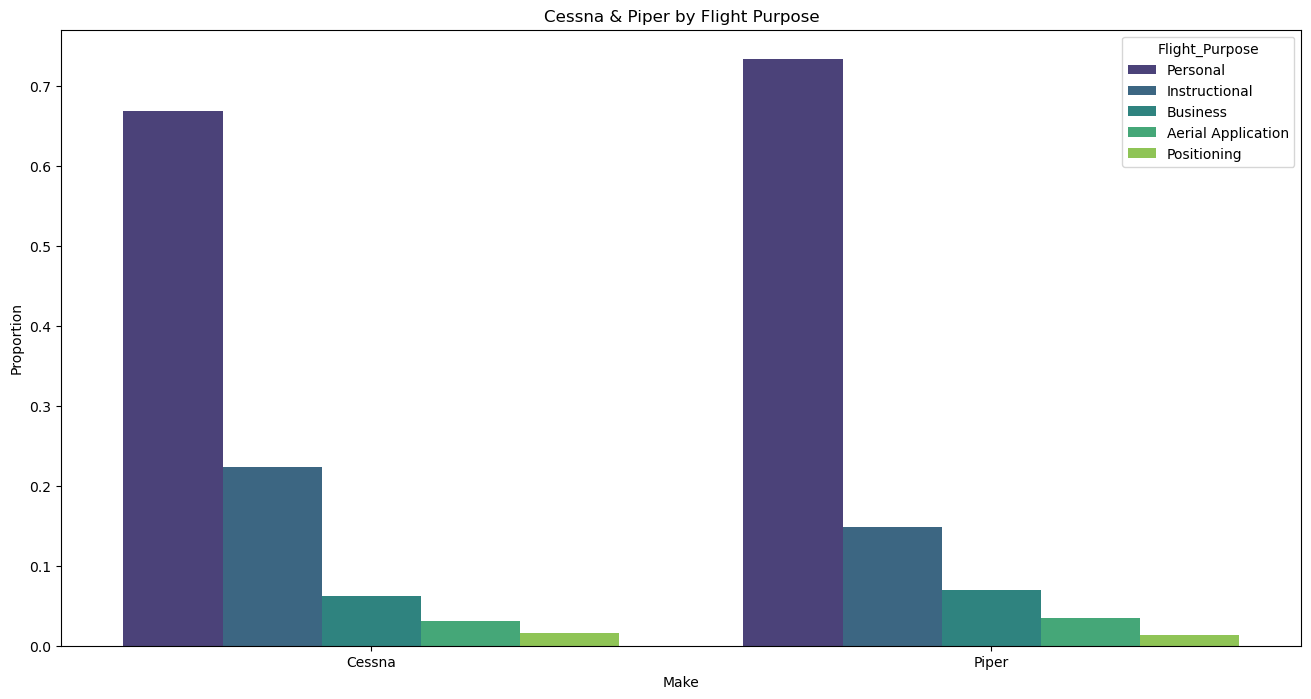

In [19]:
# Creating the figure
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

# Creating the plot
sns.barplot(data = cessna_piper_purpose, x = 'Make', y = 'Proportion', hue = 'Flight_Purpose', palette = 'viridis')

# Labelling the plot
plt.title('Cessna & Piper by Flight Purpose')
plt.xlabel('Make')
plt.ylabel('Proportion')

# Showing the plot
plt.show();

# Engine Number vs Accident Severity

In [20]:
df.head()

,index,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,People_Onboard,Abbreviation,US_State,Fatal_%
0,0,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,None,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,None,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,2,WA,Washington,0.0
1,1,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,None,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,2,NJ,New Jersey,0.0
2,2,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,None,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,3,FL,Florida,0.0
3,3,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,None,None,Non-Fatal,Substantial,None,N44832,Piper,PA-28-161,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,1,NM,New Mexico,0.0
4,4,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,None,TUSKEGEE,Non-Fatal,Substantial,None,N4275S,Beech,V35B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982,1,AL,Alabama,0.0


In [21]:
df['Number_of_Engines'].describe()

count    64497.000000
mean         1.083368
std          0.285382
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number_of_Engines, dtype: float64

In [22]:
df['Number_of_Engines'].value_counts(normalize = True) * 100

Number_of_Engines
1.0    91.801169
2.0     8.115106
4.0     0.052716
3.0     0.023257
0.0     0.004651
8.0     0.003101
Name: proportion, dtype: float64

# Engine Type vs Accident Severity

In [23]:
# Getting Engine Type Fatality Average
engine_fatal = df.groupby('Engine_Type')['Fatal_%'].mean().reset_index(name = 'Fatality_Average').query('Fatality_Average > 0').sort_values(by = 'Fatality_Average', ascending = True)

engine_fatal

,Engine_Type,Fatality_Average
7,Turbo Shaft,14.904929
3,Reciprocating,16.115349
4,Turbo Fan,18.582725
6,Turbo Prop,23.047067
5,Turbo Jet,32.269022
0,Electric,40.000000


In [24]:
# Getting Engine Fatality Category
engine_f_category = df.groupby('Engine_Type')['Injury_Severity'].value_counts(normalize = True).reset_index(name = 'Category_Proportion').query('Engine_Type != ["LR", "NONE"]')

# Renaming Columns
engine_f_category = engine_f_category.rename(columns = {'Injury_Severity' : 'Category'})

engine_f_category

,Engine_Type,Category,Category_Proportion
0,Electric,Non-Fatal,0.600000
1,Electric,Fatal,0.400000
4,Reciprocating,Non-Fatal,0.824108
5,Reciprocating,Fatal,0.175892
6,Turbo Fan,Non-Fatal,0.802920
7,Turbo Fan,Fatal,0.197080
8,Turbo Jet,Non-Fatal,0.646739
9,Turbo Jet,Fatal,0.353261
10,Turbo Prop,Non-Fatal,0.753086
11,Turbo Prop,Fatal,0.246914


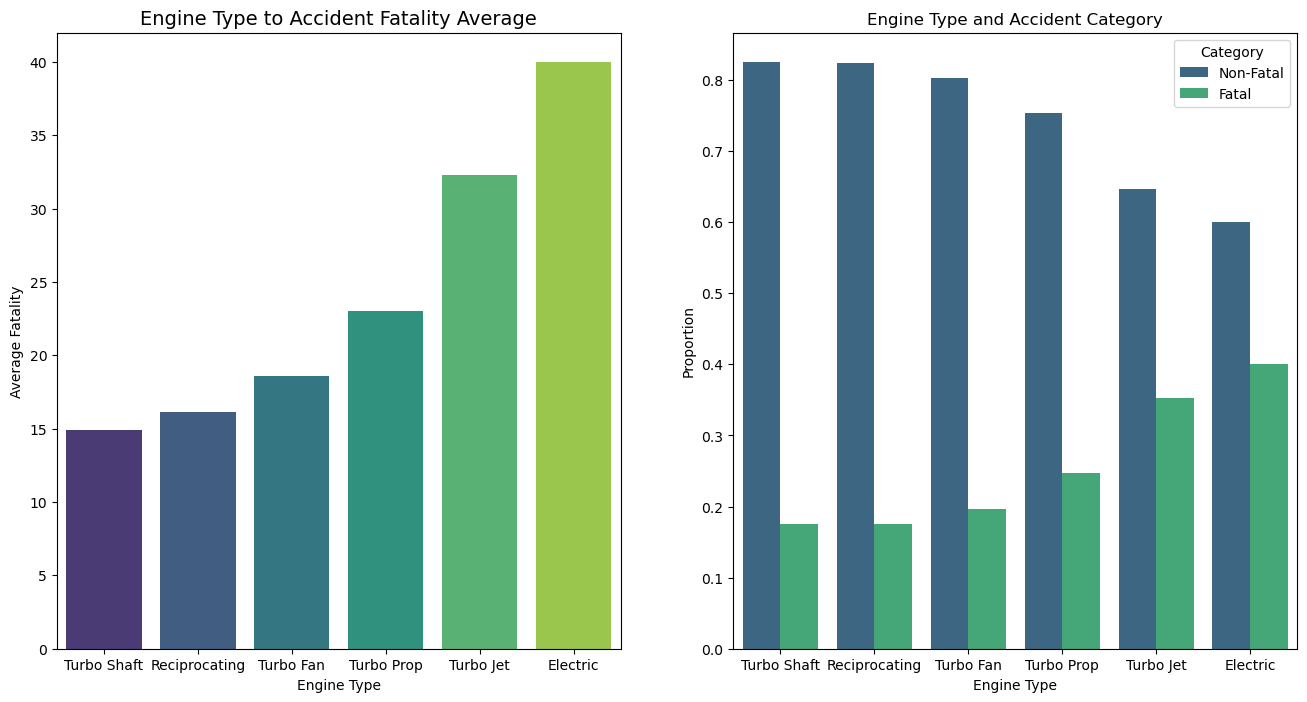

In [25]:
# Creating the figure
fig, ax = plt.subplots(1, 2, figsize = (16, 8))

# Creating the plot
sns.barplot(data = engine_fatal, x = 'Engine_Type', y = 'Fatality_Average', hue = 'Engine_Type', palette = 'viridis', ax = ax[0])

# Labeling the plot
ax[0].set_title('Engine Type to Accident Fatality Average', fontsize = 14)
ax[0].set_xlabel('Engine Type')
ax[0].set_ylabel('Average Fatality')

# Extract the correct x-axis label order
engine_order = [tick.get_text() for tick in ax[0].get_xticklabels()]

# Creating the second plot
sns.barplot(data = engine_f_category, x = 'Engine_Type', y = 'Category_Proportion', hue = 'Category', palette = 'viridis', ax = ax[1], order = engine_order)

# Labelling the plot
ax[1].set_title('Engine Type and Accident Category')
ax[1].set_xlabel('Engine Type')
ax[1].set_ylabel('Proportion')

# Showing the plot
plt.show();

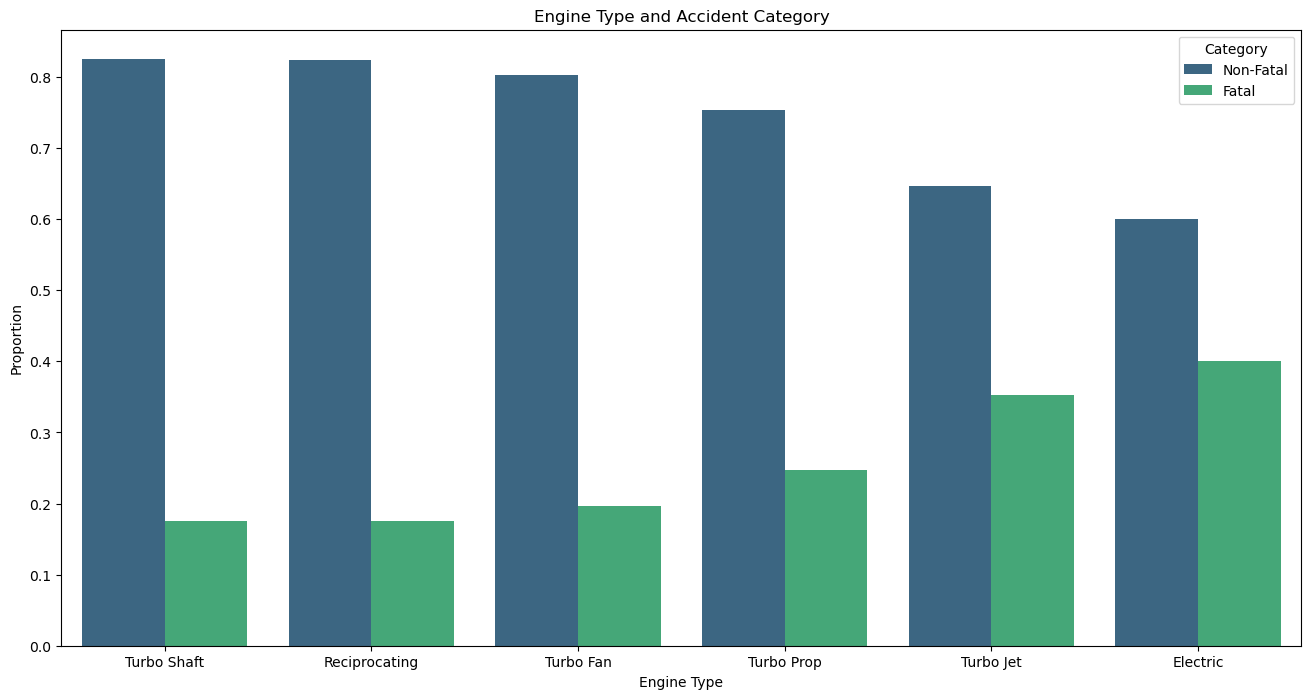

In [26]:
# Creating the figure
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

# Creating the second plot
sns.barplot(data = engine_f_category, x = 'Engine_Type', y = 'Category_Proportion', hue = 'Category', palette = 'viridis', order = engine_order)

# Labelling the plot
plt.title('Engine Type and Accident Category')
plt.xlabel('Engine Type')
plt.ylabel('Proportion')

# Showing the plot
plt.show();

# Armateur vs Professional

In [27]:
df.columns

Index(['index', 'Event_Id', 'Investigation_Type', 'Accident_Number',
       'Event_Date', 'Location', 'Country', 'Airport_Code', 'Airport_Name',
       'Injury_Severity', 'Aircraft_damage', 'Aircraft_Category',
       'Registration_Number', 'Make', 'Model', 'Amateur_Built',
       'Number_of_Engines', 'Engine_Type', 'FAR_Description', 'Schedule',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status', 'Publication_Date', 'Year',
       'People_Onboard', 'Abbreviation', 'US_State', 'Fatal_%'],
      dtype='object')

In [29]:
df['Amateur_Built'].value_counts(normalize = True)

Amateur_Built
No     0.886665
Yes    0.113335
Name: proportion, dtype: float64

In [32]:
amateur_fatality = df.groupby('Amateur_Built')['Injury_Severity'].value_counts(normalize = True).reset_index(name = 'Proportion')

amateur_fatality

,Amateur_Built,Injury_Severity,Proportion
0,No,Non-Fatal,0.832334
1,No,Fatal,0.167666
2,Yes,Non-Fatal,0.737901
3,Yes,Fatal,0.262099


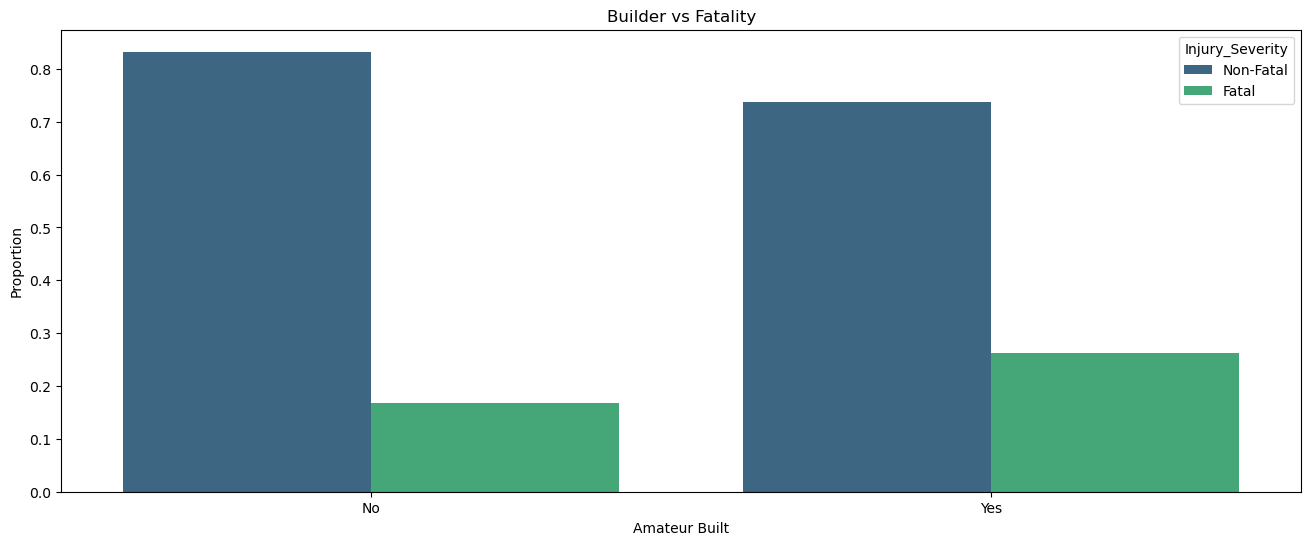

In [35]:
# Creating the figure
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

# Creating the plot
sns.barplot(data = amateur_fatality, x = 'Amateur_Built', y = 'Proportion', hue = 'Injury_Severity', palette = 'viridis')

# Labelling the plot
plt.title('Builder vs Fatality')
plt.xlabel('Amateur Built')
plt.ylabel('Proportion')

# Showing the plot
plt.show();

# Trend for Aircraft Accidents over Time

In [34]:
fatality_trend = df.groupby('Year')['Injury_Severity'].value_counts(normalize = True).unstack()

fatality_trend

Injury_Severity,Fatal,Non-Fatal
Year,,
1982,0.180967,0.819033
1983,0.182686,0.817314
1984,0.178559,0.821441
1985,0.170418,0.829582
1986,0.178035,0.821965
1987,0.168204,0.831796
1988,0.186778,0.813222
1989,0.185823,0.814177
1990,0.193779,0.806221


/var/folders/dk/bbbpl6jd64q1jk5kph5vgr300000gn/T/ipykernel_1401/2836484928.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = fatality_trend, x = 'Year', y = 'Non-Fatal', palette = 'viridis')


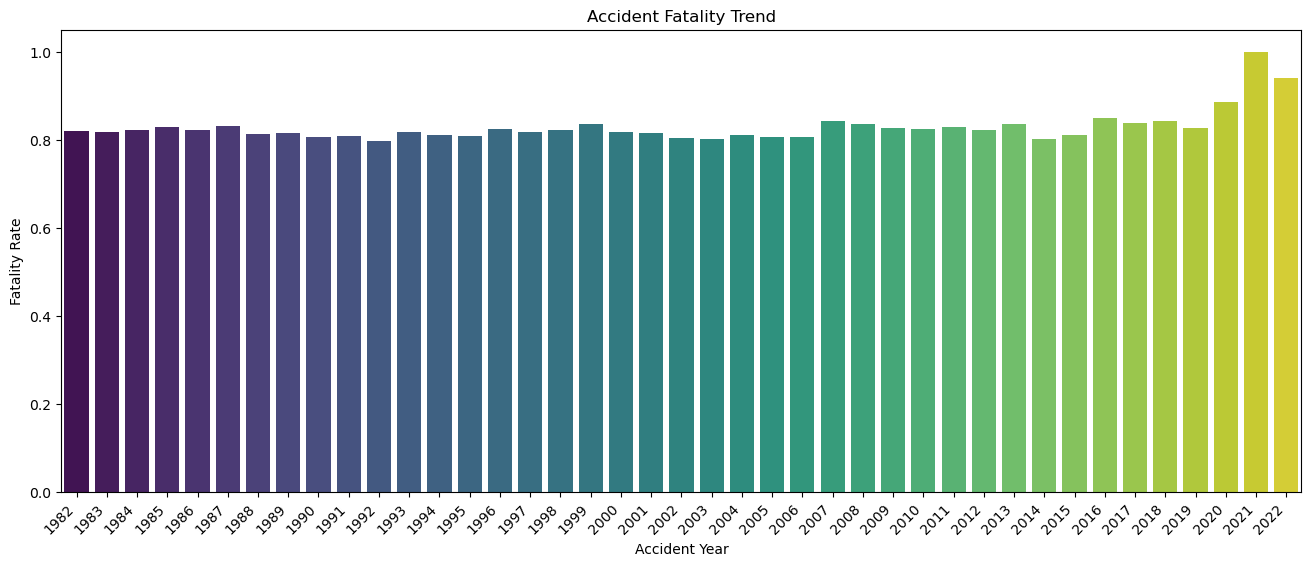

In [82]:
# Creating the figure
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

# Creating the plot
sns.barplot(data = fatality_trend, x = 'Year', y = 'Non-Fatal', palette = 'viridis')

# Labelling the plot
plt.title('Accident Fatality Trend')
plt.xlabel('Accident Year')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Fatality Rate')

# Showing the plot
plt.show() 

# Board Phase of Flight

In [46]:
df['Broad_phase_of_flight'].unique()

array(['Takeoff', 'Landing', 'Cruise', 'Approach', 'Taxi', 'Unknown',
       'Descent', 'Maneuvering', 'Climb', 'Go-around', 'Standing',
       'Other', None], dtype=object)

In [55]:
df = df[df['Broad_phase_of_flight'].isin(['Takeoff', 'Landing', 'Cruise', 'Approach', 'Taxi',
       'Descent', 'Maneuvering', 'Climb', 'Go-around', 'Standing'])].copy()

In [58]:
phase_fatality = df.groupby('Broad_phase_of_flight')['Injury_Severity'].value_counts(normalize = True).reset_index(name = 'Proportion').sort_values(by = 'Proportion', ascending = False)

phase_fatality

,Broad_phase_of_flight,Injury_Severity,Proportion
10,Landing,Non-Fatal,0.982929
18,Taxi,Non-Fatal,0.979955
14,Standing,Non-Fatal,0.904930
16,Takeoff,Non-Fatal,0.855978
8,Go-around,Non-Fatal,0.813002
0,Approach,Non-Fatal,0.752165
6,Descent,Non-Fatal,0.730428
4,Cruise,Non-Fatal,0.730165
2,Climb,Non-Fatal,0.671159
12,Maneuvering,Non-Fatal,0.610840


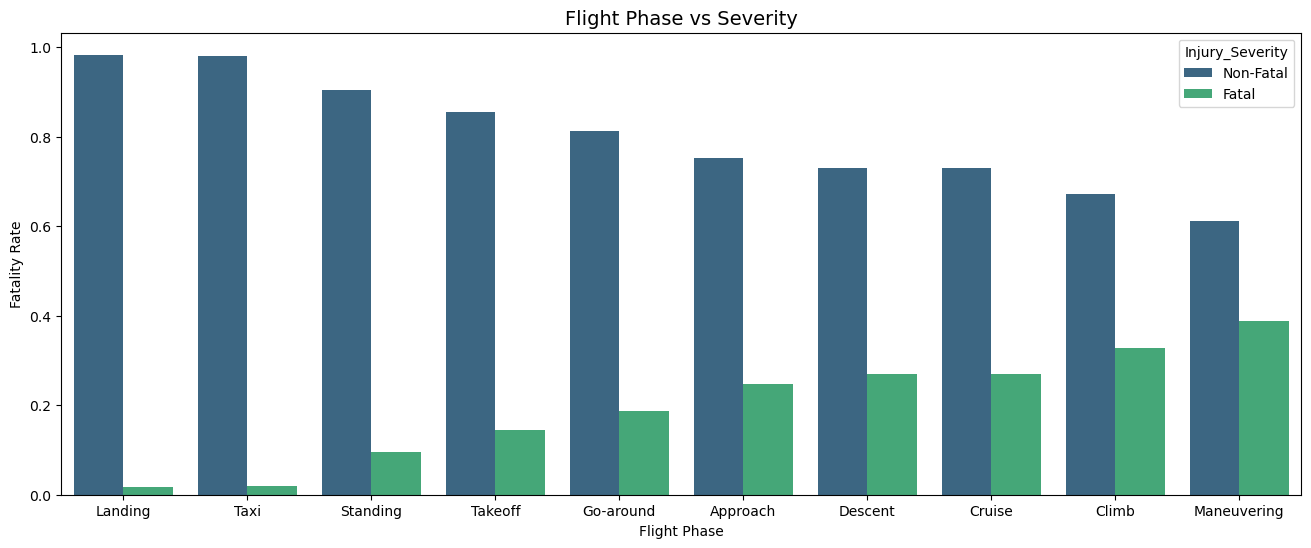

In [60]:
# Creating the figure
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

# Creating the plot
sns.barplot(data = phase_fatality, x = 'Broad_phase_of_flight', y = 'Proportion', hue = 'Injury_Severity', palette = 'viridis')

# Labelling the plot
plt.title('Flight Phase vs Severity', fontsize = 14)
plt.xlabel('Flight Phase')
# plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Fatality Rate')

# Showing the plot
plt.show(); 

/var/folders/dk/bbbpl6jd64q1jk5kph5vgr300000gn/T/ipykernel_1401/841579710.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Broad_phase_of_flight', order = order, palette = 'viridis')


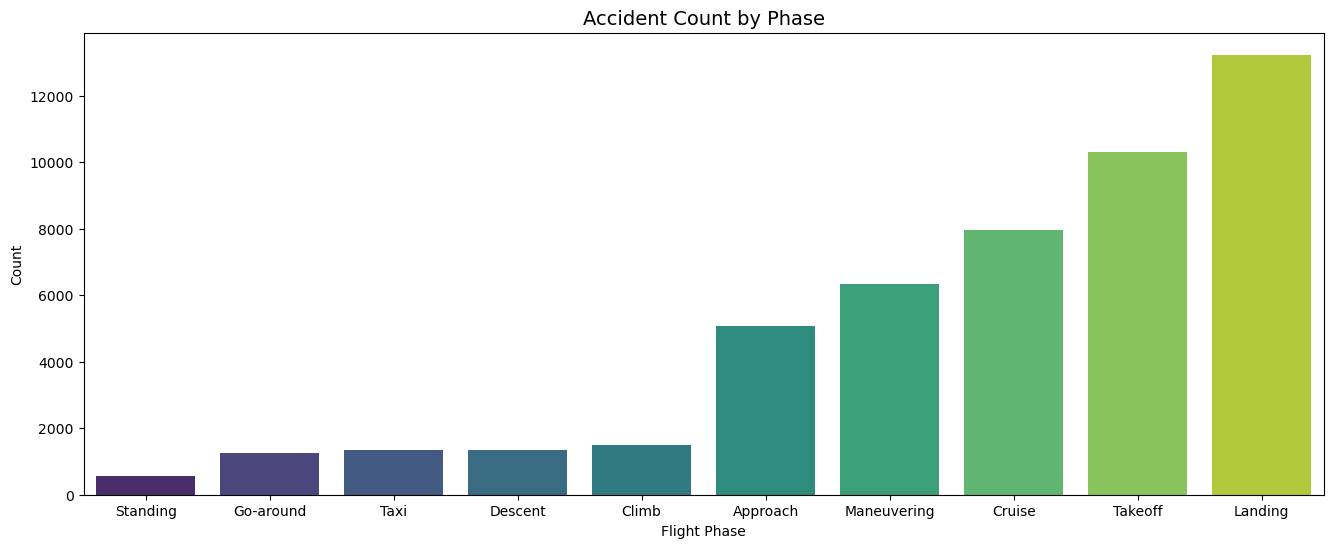

In [74]:
# Computing the order based on count
order = df['Broad_phase_of_flight'].value_counts(ascending=True).index

# Creating the figure
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

# Creating the plot
sns.countplot(data = df, x = 'Broad_phase_of_flight', order = order, palette = 'viridis')

# Labelling the plot
plt.title('Accident Count by Phase', fontsize = 14)
plt.xlabel('Flight Phase')
# plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count')

# Showing the plot
plt.show(); 

# Accident Count Trend

In [76]:
accident_count_trend = df['Year'].value_counts().reset_index(name = 'Count').sort_values(by = 'Year', ascending = True)

accident_count_trend

,Year,Count
2,1982,2629
0,1983,2788
1,1984,2755
3,1985,2464
4,1986,2313
5,1987,2260
6,1988,2149
8,1989,1958
9,1990,1936
7,1991,1972


/var/folders/dk/bbbpl6jd64q1jk5kph5vgr300000gn/T/ipykernel_1401/3221455817.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = accident_count_trend, x = 'Year', y = 'Count', palette = 'viridis')


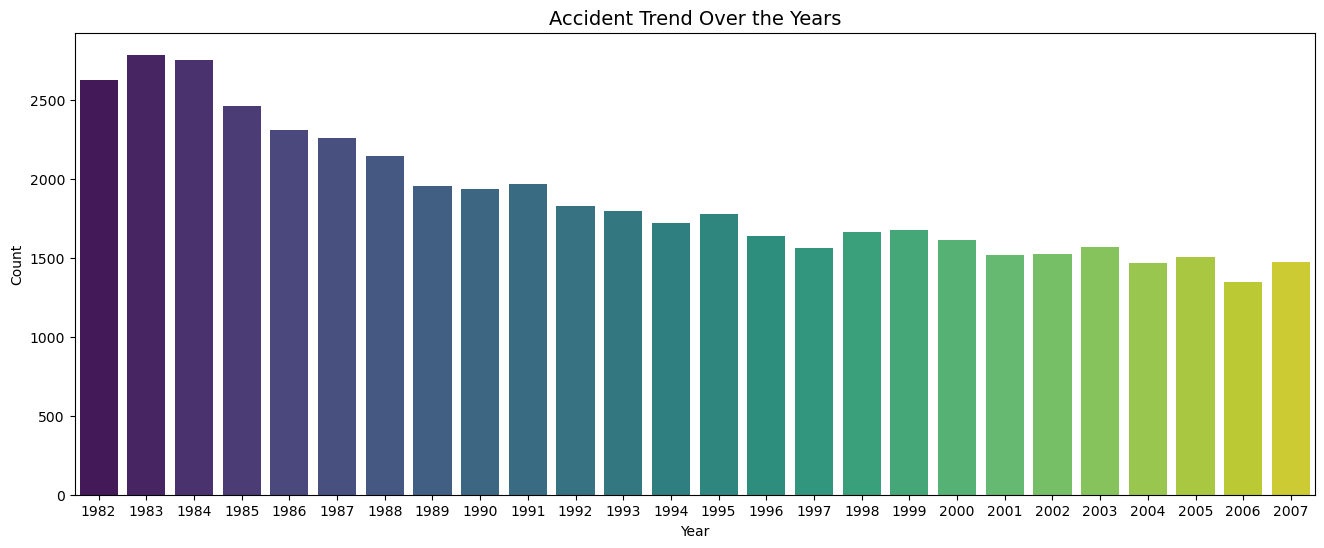

In [78]:
# Creating the figure
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

# Creating the plot
sns.barplot(data = accident_count_trend, x = 'Year', y = 'Count', palette = 'viridis')

# Labelling the plot
plt.title('Accident Trend Over the Years', fontsize = 14)
plt.xlabel('Year')
# plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count')

# Showing the plot
plt.show(); 

# Save Off

In [80]:
df.to_parquet('../data/03_data_visualisations.parquet')

In [81]:
df.to_csv('../data/aviation_dashboard.csv')